# Assignment 1 : Ensemble Model

### by SasiNakchatree

## Installing Package 

In [3]:
import pandas as pd
import numpy as np
from sklearn import ensemble
from sklearn.externals import joblib
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import train_test_split

In [4]:
# Download data 
data=pd.read_csv("C:/Users/White/OneDrive/Desktop/loan.csv")

D:\anaconda\lib\site-packages\IPython\core\interactiveshell.py:3020: DtypeWarning: Columns (19,47,55,112,123,124,125,128,129,130,133,139,140,141) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [5]:
data.head(10)

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,hardship_payoff_balance_amount,hardship_last_payment_amount,disbursement_method,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
0,NaN,NaN,2500,2500,2500.0,36 months,13.56,84.92,C,C1,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,30000,30000,30000.0,60 months,18.94,777.23,D,D2,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,5000,5000,5000.0,36 months,17.97,180.69,D,D1,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,4000,4000,4000.0,36 months,18.94,146.51,D,D2,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,30000,30000,30000.0,60 months,16.14,731.78,C,C4,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,5550,5550,5550.0,36 months,15.02,192.45,C,C3,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
6,NaN,NaN,2000,2000,2000.0,36 months,17.97,72.28,D,D1,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
7,NaN,NaN,6000,6000,6000.0,36 months,13.56,203.79,C,C1,...,NaN,NaN,DirectPay,N,NaN,NaN,NaN,NaN,NaN,NaN
8,NaN,NaN,5000,5000,5000.0,36 months,17.97,180.69,D,D1,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
9,NaN,NaN,6000,6000,6000.0,36 months,14.47,206.44,C,C2,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
data.dtypes.value_counts()

float64    105
object      36
int64        4
dtype: int64

In [131]:
adj_data = data.drop(["id","member_id", "term","sub_grade", "emp_title","disbursement_method"
                       ,"home_ownership","verification_status","verification_status_joint","issue_d"
                       ,"pymnt_plan","url","desc","collection_recovery_fee","int_rate","out_prncp"
                       ,"out_prncp_inv","purpose","title","zip_code","addr_state","earliest_cr_line"
                       ,"settlement_date","payment_plan_start_date","hardship_end_date","hardship_start_date"
                       ,"debt_settlement_flag_date","last_pymnt_d","next_pymnt_d","last_credit_pull_d"
                       ,"sec_app_earliest_cr_line","recoveries"],1)             

In [132]:
adj_data.dtypes.value_counts()

float64    97
object     12
int64       4
dtype: int64

In [133]:
adj_data.head()

,loan_amnt,funded_amnt,funded_amnt_inv,installment,grade,emp_length,annual_inc,loan_status,dti,delinq_2yrs,...,hardship_dpd,hardship_loan_status,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,debt_settlement_flag,settlement_status,settlement_amount,settlement_percentage,settlement_term
0,2500,2500,2500.0,84.92,C,10+ years,55000.0,Current,18.24,0.0,...,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN
1,30000,30000,30000.0,777.23,D,10+ years,90000.0,Current,26.52,0.0,...,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN
2,5000,5000,5000.0,180.69,D,6 years,59280.0,Current,10.51,0.0,...,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN
3,4000,4000,4000.0,146.51,D,10+ years,92000.0,Current,16.74,0.0,...,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN
4,30000,30000,30000.0,731.78,C,10+ years,57250.0,Current,26.35,0.0,...,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN


## Cleaning data 

### Imputing negative and positive relationship

In [134]:
negative = ["all_util","annual_inc","annual_inc_joint","avg_cur_bal","bc_util",
            "hardship_last_payment_amount","il_util","inq_fi","last_pymnt_amnt",
            "mo_sin_old_il_acct","mo_sin_old_rev_tl_op","mo_sin_rcnt_rev_tl_op",
            "mo_sin_rcnt_tl","mths_since_last_delinq","mths_since_last_major_derog",
            "mths_since_last_record","mths_since_recent_bc_dlq","mths_since_recent_revol_delinq",
            "mths_since_recent_bc","num_actv_bc_tl","num_actv_rev_tl","num_bc_sats",
            "num_bc_tl","num_il_tl","num_op_rev_tl","num_rev_accts","num_rev_tl_bal_gt_0",
            "num_sats","open_acc","open_acc_6m","open_rv_12m","open_rv_24m","pct_tl_nvr_dlq",
            "revol_bal_joint","revol_util","sec_app_open_acc","sec_app_revol_util",
            "sec_app_open_act_il","sec_app_num_rev_accts","sec_app_mths_since_last_major_derog",
            "total_acc","tot_cur_bal","total_bal_il","total_cu_tl"]

positive = ["acc_now_delinq","acc_open_past_24mths","bc_open_to_buy","chargeoff_within_12_mths",
            "collections_12_mths_ex_med","delinq_amnt","deferral_term","delinq_2yrs","dti",
            "dti_joint","funded_amnt_inv","hardship_amount","hardship_length","hardship_dpd",
            "hardship_payoff_balance_amount","inq_last_6mths","inq_last_12m","mths_since_rcnt_il",
            "max_bal_bc","mort_acc","mths_since_recent_inq","num_accts_ever_120_pd","num_tl_120dpd_2m",
            "num_tl_30dpd","num_tl_90g_dpd_24m","num_tl_op_past_12m","orig_projected_additional_accrued_interest",
            "open_act_il","open_il_12m","open_il_24m","percent_bc_gt_75","pub_rec_bankruptcies","pub_rec",
            "sec_app_inq_last_6mths","sec_app_mort_acc","sec_app_chargeoff_within_12_mths",
            "sec_app_collections_12_mths_ex_med","settlement_amount","settlement_percentage","settlement_term",
            "tax_liens","total_bal_ex_mort","tot_hi_cred_lim","total_bc_limit","total_il_high_credit_limit",
            "total_rev_hi_lim","tot_coll_amt","total_rec_prncp","total_rec_late_fee"]

In [135]:
for i in negative:
    adj_data[i].fillna(-100000000,inplace=True)
    
for i in positive:
    adj_data[i].fillna(100000000,inplace=True)

### Ranking and relative values 

In [136]:
adj_data["emp_length"].replace("n/a",0, inplace = True)
adj_data["emp_length"].replace("< 1 year",0, inplace = True)
adj_data["emp_length"].replace("1 year",1, inplace = True)
adj_data["emp_length"].replace("2 years",2, inplace = True)
adj_data["emp_length"].replace("3 years",3, inplace = True)
adj_data["emp_length"].replace("4 years",4, inplace = True)
adj_data["emp_length"].replace("5 years",5, inplace = True)
adj_data["emp_length"].replace("6 years",6, inplace = True)
adj_data["emp_length"].replace("7 years",7, inplace = True)
adj_data["emp_length"].replace("8 years",8, inplace = True)
adj_data["emp_length"].replace("9 years",9, inplace = True)
adj_data["emp_length"].replace("10+ years",10, inplace = True)

In [137]:
adj_data["loan_status"].replace("Current",0, inplace = True)
adj_data["loan_status"].replace("Fully Paid",0, inplace = True)
adj_data["loan_status"].replace("Default",1, inplace = True)
adj_data["loan_status"].replace("Charged Off",1, inplace = True)
adj_data["loan_status"].replace("In Grace Period",1, inplace = True)
adj_data["loan_status"].replace("Late (16-30 days)",1, inplace = True)
adj_data["loan_status"].replace("Late (31-120 days)",1, inplace = True)
adj_data["loan_status"].replace("Does not meet the credit policy. Status:Fully Paid",1, inplace = True)
adj_data["loan_status"].replace("Does not meet the credit policy. Status:Charged Off",1, inplace = True)

In [138]:
adj_data["grade"].replace("A",1, inplace = True)
adj_data["grade"].replace("B",2, inplace = True)
adj_data["grade"].replace("C",3, inplace = True)
adj_data["grade"].replace("D",4, inplace = True)
adj_data["grade"].replace("E",5, inplace = True)
adj_data["grade"].replace("F",6, inplace = True)
adj_data["grade"].replace("G",7, inplace = True)

In [139]:
adj_data["hardship_type"].replace("nan",0, inplace = True)
adj_data["hardship_type"].replace("INTEREST ONLY-3 MONTHS DEFERRAL",1, inplace = True)

In [140]:
adj_data["hardship_status"].replace("ACTIVE",1, inplace = True)
adj_data["hardship_status"].replace("COMPLETED",1, inplace = True)
adj_data["hardship_status"].replace("BROKEN",1, inplace = True)
adj_data["hardship_status"].replace("nan",0, inplace = True)

In [141]:
adj_data["hardship_reason"].replace("UNEMPLOYMENT",1, inplace = True)
adj_data["hardship_reason"].replace("NATURAL_DISASTER",1, inplace = True)
adj_data["hardship_reason"].replace("EXCESSIVE_OBLIGATIONS",1, inplace = True)
adj_data["hardship_reason"].replace("MEDICAL",1, inplace = True)
adj_data["hardship_reason"].replace("INCOME_CURTAILMENT",1, inplace = True)
adj_data["hardship_reason"].replace("DISABILITY",1, inplace = True)
adj_data["hardship_reason"].replace("REDUCED_HOURS",1, inplace = True)
adj_data["hardship_reason"].replace("FAMILY_DEATH",1, inplace = True)
adj_data["hardship_reason"].replace("'DIVORCE",1, inplace = True)
adj_data["hardship_reason"].replace("NaN",0, inplace = True)

In [142]:
adj_data["hardship_loan_status"].replace("nan",0,inplace = True)
adj_data["hardship_loan_status"].replace("Current",1,inplace = True)
adj_data["hardship_loan_status"].replace("Issued",1,inplace = True)
adj_data["hardship_loan_status"].replace("In Grace Period",1,inplace = True)
adj_data["hardship_loan_status"].replace("Late (16-30 days)",1,inplace = True)
adj_data["hardship_loan_status"].replace("Late (31-120 days)",1,inplace = True)

In [143]:
adj_data["settlement_status"].replace("ACTIVE",1, inplace = True)
adj_data["settlement_status"].replace("COMPLETED",1, inplace = True)
adj_data["settlement_status"].replace("BROKEN",0, inplace = True)
adj_data["settlement_status"].replace("CANCELLED",0, inplace = True)
adj_data["settlement_status"].replace("DENIED",0, inplace = True)
adj_data["settlement_status"].replace("DRAFT",0, inplace = True)
adj_data["settlement_status"].replace("NaN",0, inplace = True)

In [144]:
adj_data["debt_settlement_flag"].replace("Y",1, inplace = True)
adj_data["debt_settlement_flag"].replace("N",0, inplace = True)

### Clear NaN values 

In [145]:
adj_data["emp_length"].fillna(-100000000,inplace=True)
adj_data["hardship_type"].fillna(0,inplace=True)
adj_data["hardship_reason"].fillna(0,inplace=True)
adj_data["hardship_status"].fillna(0,inplace=True)
adj_data["hardship_loan_status"].fillna(0,inplace=True)
adj_data["settlement_status"].fillna(0,inplace=True)

### Using Dummies for 'object' data 

In [146]:
adj_data.select_dtypes('object')

,initial_list_status,application_type,hardship_flag,hardship_reason,settlement_status
0,w,Individual,N,0,0
1,w,Individual,N,0,0
2,w,Individual,N,0,0
3,w,Individual,N,0,0
4,w,Individual,N,0,0
5,w,Individual,N,0,0
6,w,Individual,N,0,0
7,w,Individual,N,0,0
8,w,Individual,N,0,0
9,w,Individual,N,0,0


In [147]:
obj = ["initial_list_status","application_type","hardship_flag","hardship_reason","settlement_status"]
dummies = pd.get_dummies(adj_data[obj], drop_first = True)
dummies

,initial_list_status_w,application_type_Joint App,hardship_flag_Y,hardship_reason_1,hardship_reason_DIVORCE,settlement_status_1,settlement_status_COMPLETE
0,1,0,0,0,0,0,0
1,1,0,0,0,0,0,0
2,1,0,0,0,0,0,0
3,1,0,0,0,0,0,0
4,1,0,0,0,0,0,0
5,1,0,0,0,0,0,0
6,1,0,0,0,0,0,0
7,1,0,0,0,0,0,0
8,1,0,0,0,0,0,0
9,1,0,0,0,0,0,0


In [148]:
adj_data = pd.concat([adj_data,dummies],axis=1)
adj_data = adj_data.drop(obj,axis=1)

In [149]:
adj_data.isnull().sum()

loan_amnt                                     0
funded_amnt                                   0
funded_amnt_inv                               0
installment                                   0
grade                                         0
emp_length                                    0
annual_inc                                    0
loan_status                                   0
dti                                           0
delinq_2yrs                                   0
inq_last_6mths                                0
mths_since_last_delinq                        0
mths_since_last_record                        0
open_acc                                      0
pub_rec                                       0
revol_bal                                     0
revol_util                                    0
total_acc                                     0
total_pymnt                                   0
total_pymnt_inv                               0
total_rec_prncp                         

## Model

In [150]:
#Set parameter
model_data = adj_data

y = model_data["loan_status"] 
x = model_data.drop("loan_status",axis= 1)

In [151]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)

### Using GBM model 

In [153]:
params = {'n_estimators': 10,'max_leaf_nodes':6,'learning_rate': 0.1, 'random_state':1}
model = ensemble.GradientBoostingClassifier(**params)
model.fit(x_train, y_train)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=6,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=10,
              n_iter_no_change=None, presort='auto', random_state=1,
              subsample=1.0, tol=0.0001, validation_fraction=0.1,
              verbose=0, warm_start=False)

In [154]:
#Calculate ROC AUC score
roc_auc_score(y_test, model.predict(x_test))

0.6445228222340816

In [159]:
#Try 50 estimators
params = {'n_estimators': 50,'max_leaf_nodes':6,'learning_rate': 0.1, 'random_state':1}
model = ensemble.GradientBoostingClassifier(**params)
model.fit(x_train, y_train)

roc_auc_score(y_test, model.predict(x_test))

0.7351369768680189

In [156]:
#Try 100 extimators #Best 
params = {'n_estimators': 100,'max_leaf_nodes':6,'learning_rate': 0.1, 'random_state':1}
model = ensemble.GradientBoostingClassifier(**params)
model.fit(x_train, y_train)

roc_auc_score(y_test, model.predict(x_test))

0.765884576393102

### Important Features 

In [160]:
features = pd.DataFrame()
features['Feature'] = x_train.columns
features['Importance'] = model.feature_importances_

features = features.sort_values(by='Importance', ascending = False)
features.head(20)

,Feature,Importance
33,open_il_12m,0.159727
1,funded_amnt,0.158231
19,total_rec_prncp,0.126539
106,settlement_term,0.109629
22,last_pymnt_amnt,0.089231
4,grade,0.079703
21,total_rec_late_fee,0.060628
34,open_il_24m,0.045263
104,settlement_amount,0.042356
3,installment,0.033088


In [161]:
# 13 first important features
Imp_feats = ["funded_amnt","total_rec_prncp","open_il_12m","last_pymnt_amnt",
            "grade","total_rec_late_fee","debt_settlement_flag",
            "settlement_amount","installment","open_il_24m",
            "settlement_term","inq_last_12m","loan_amnt"]

### Find the Best result

In [162]:
# Set new train and test
xx_train = x_train[Imp_feats]
xx_test = x_test[Imp_feats]

In [165]:
# run a grid search on GBM parameters
# save the results to choose the best parameters
results = pd.DataFrame(columns=["# Trees", "Max Features", "Learning Rate",
                                "Max Leaf Nodes", "Min Split","AUC_Train","AUC_Test"])
    
for n_estimators in [50,100]:
        for max_features in ['sqrt','auto']:
                for learning_rate in [0.01, 0.1, 0.5]:
                    for max_leaf_nodes in [6, 8, 10, 15, 20]:
                            for min_samples_split in [0.1, 0.2, 0.3]:
                                params = {'n_estimators': n_estimators,  
                                  'max_features':max_features,'max_leaf_nodes':max_leaf_nodes, 
                                  'learning_rate': learning_rate, 
                                  'min_samples_split': min_samples_split,
                                  'subsample':0.8, 'random_state':1}
                                model = ensemble.GradientBoostingClassifier(**params)
                                model.fit(xx_train, y_train)
                                results.loc[len(results)]=[n_estimators, max_features, learning_rate,
                                               max_leaf_nodes, min_samples_split,
                                               roc_auc_score(y_train, model.predict(xx_train)),
                                               roc_auc_score(y_test, model.predict(xx_test))]


In [168]:
results.sort_values(['AUC_Train', 'AUC_Test'], ascending=False).head(10)

,# Trees,Max Features,Learning Rate,Max Leaf Nodes,Min Split,AUC_Train,AUC_Test
171,100,auto,0.5,10,0.1,0.793457,0.794354
174,100,auto,0.5,15,0.1,0.793394,0.794348
177,100,auto,0.5,20,0.1,0.793394,0.794348
168,100,auto,0.5,8,0.1,0.793354,0.794448
169,100,auto,0.5,8,0.2,0.790990,0.791626
172,100,auto,0.5,10,0.2,0.790947,0.791664
175,100,auto,0.5,15,0.2,0.790947,0.791664
178,100,auto,0.5,20,0.2,0.790947,0.791664
166,100,auto,0.5,6,0.2,0.790481,0.791253
165,100,auto,0.5,6,0.1,0.790130,0.791534


In [169]:
params = {'n_estimators': 100,'max_leaf_nodes':10,'learning_rate': 0.5, 'random_state':1}
best_model = ensemble.GradientBoostingClassifier(**params)
best_model.fit(xx_train, y_train)

roc_auc_score(y_test, best_model.predict(xx_test))

0.8006365773789009

### Plot Histrogram

In [183]:
results = pd.DataFrame()
results['loan_status']= y_test
results['No Delinquency'] = best_model.predict_proba(xx_test)[:, 0]
results['Delinquent'] = best_model.predict_proba(xx_test)[:, 1]
results.head(10)

,loan_status,No Delinquency,Delinquent
1948749,0,0.999138,0.000862
321367,0,0.838110,0.161890
1665491,0,0.816716,0.183284
511924,0,0.997327,0.002673
1147501,0,0.998646,0.001354
763203,0,0.997904,0.002096
1794150,0,0.979377,0.020623
1539119,0,0.998683,0.001317
198681,1,0.005307,0.994693
1307661,1,0.167329,0.832671


In [193]:
De = results[results.loan_status==1]['Delinquent']
NoDe = results[results.loan_status==0]['No Delinquency']

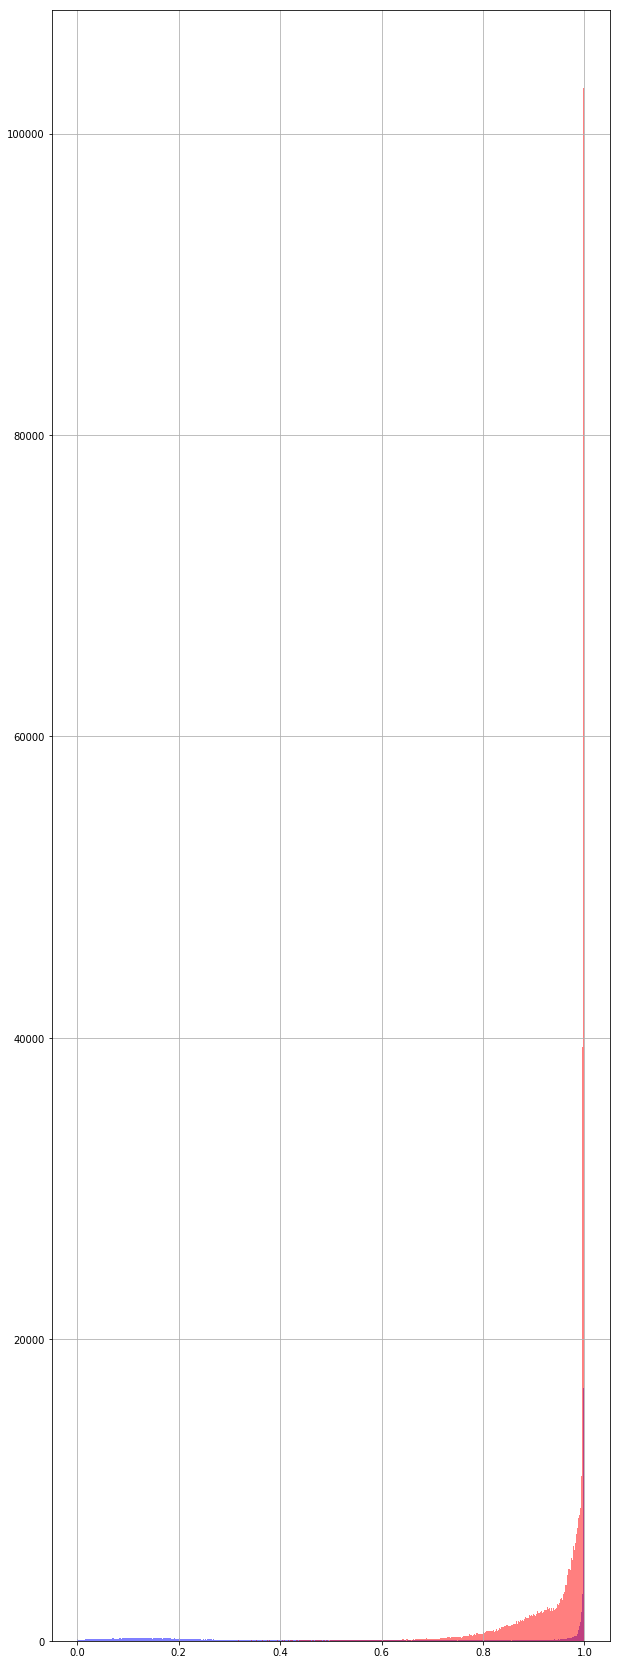

In [207]:
#Plot Histogram
import matplotlib.pyplot as plt
plt.figure(figsize=(10,30))
De.hist(alpha=0.5,color='blue',bins=500)
NoDe.hist(alpha=0.5,color='red',bins=500)
plt.show()